## PCA on WHO life expectancy data

In [76]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [77]:
plt.style.use("seaborn-v0_8")

In [78]:
df_big = pd.read_csv("Data/Health/diet.csv")
df_big = df_big.set_index("SEQN").join(pd.read_csv("Data/Health/examination.csv").set_index("SEQN"))
df_big.head(20)
df_big.count()

WTDRD1      9813
WTDR2D      8661
DR1DRSTZ    9813
DR1EXMER    8783
DRABF       8661
            ... 
CSXSLTRT    1595
CSXSLTRG    1595
CSXNART     1613
CSXNARG     1613
CSAEFFRT    3537
Length: 390, dtype: int64

In [79]:
df = df_big[["DR1TKCAL", "DR1TFIBE", "DR1TSUGR", "DR1TTFAT", "MGDCGSZ", "BPXSY1", "BPXDI1", "BPXPLS", "BMXBMI"]].copy() #
#(df.sort_values("Year", ascending=False)).head(400), "DR1TKCAL", "DR1TPROT", "DR1TCARB", "DR1TSUGR", "DR1TFIBE", "DR1TTFAT", "DR1TSFAT", "DR1TMFAT", "DR1TPFAT", 

Now remove certain columns from the original dataframe.

In [80]:
df_cleaned = df#.drop(["Status", "Country"], axis=1)
df_cleaned

,DR1TKCAL,DR1TFIBE,DR1TSUGR,DR1TTFAT,MGDCGSZ,BPXSY1,BPXDI1,BPXPLS,BMXBMI
SEQN,,,,,,,,,
73557,1574.0,10.8,176.47,52.81,55.2,122.0,72.0,86.0,26.7
73558,5062.0,16.7,44.99,124.29,61.5,156.0,62.0,74.0,28.6
73559,1743.0,9.9,102.90,65.97,91.0,140.0,90.0,68.0,28.9
73560,1490.0,10.6,80.58,58.27,32.2,108.0,38.0,64.0,17.1
73561,1421.0,12.3,87.78,55.36,30.9,136.0,86.0,92.0,19.7
...,...,...,...,...,...,...,...,...,...
83727,4687.0,30.4,160.63,193.51,70.1,110.0,68.0,60.0,24.5
83728,1253.0,9.3,50.73,52.39,NaN,NaN,NaN,NaN,15.9
83729,2475.0,25.7,126.54,110.30,46.6,136.0,82.0,80.0,34.0


In [81]:
df.isna().sum()

DR1TKCAL    1282
DR1TFIBE    1282
DR1TSUGR    1282
DR1TTFAT    1282
MGDCGSZ     2136
BPXSY1      2641
BPXDI1      2641
BPXPLS      2264
BMXBMI       758
dtype: int64

It clear that there are quite a number of missing entries, in particular for Population, Hepatitis B and total expenditure. The easiest way to deal with them is to just remove them.

[[ 1.         -0.19624468]
 [-0.19624468  1.        ]]


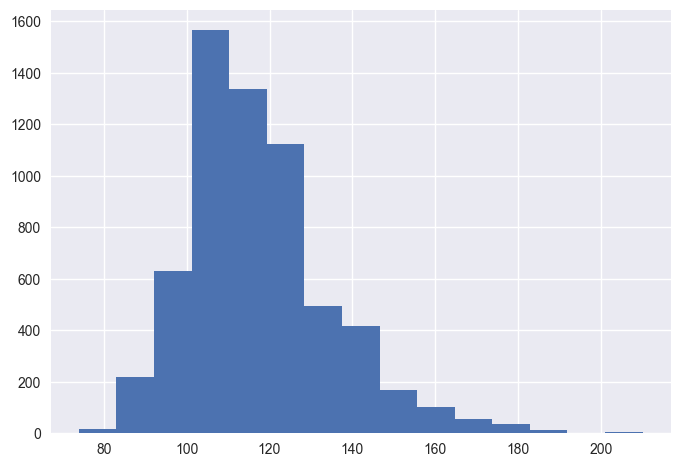

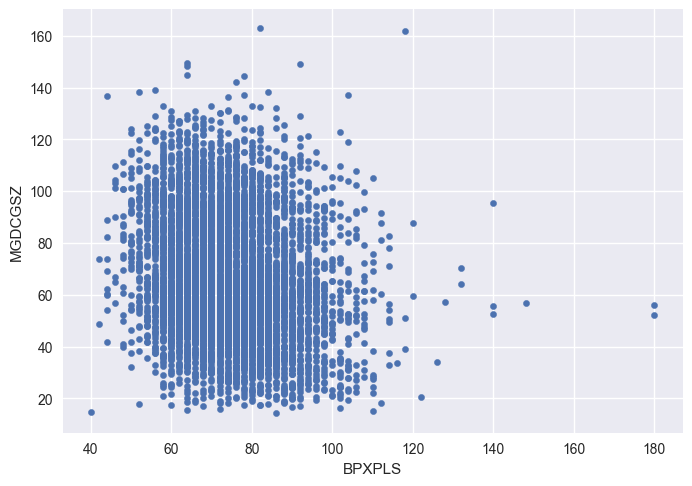

In [82]:
df_cleaned = df_cleaned.dropna()
plt.hist(df_cleaned["BPXSY1"],bins=15)
'''df_cleaned = df_cleaned[df_cleaned["Year"]==2014]
df_cleaned = df_cleaned.drop("Year", axis=1)'''
df_cleaned.plot.scatter("BPXPLS", "MGDCGSZ")
print(np.corrcoef((df_cleaned["BPXPLS"]-df_cleaned["BPXPLS"].mean())/df_cleaned["BPXPLS"].std(), (df_cleaned["MGDCGSZ"]-df_cleaned["MGDCGSZ"].mean())/df_cleaned["MGDCGSZ"].std()))

plt.savefig('Figures/Scatterplot.png')
#df_cleaned = df_cleaned.drop(df_cleaned["Year"]!=2015, axis=1)

In [83]:
investigate = 'DR1TKCAL'
df_ImportantFeature = df_cleaned[investigate]
df_ImportantFeature

SEQN
73557    1574.0
73558    5062.0
73559    1743.0
73560    1490.0
73561    1421.0
          ...  
83721    1225.0
83724    2432.0
83727    4687.0
83729    2475.0
83731    2877.0
Name: DR1TKCAL, Length: 6194, dtype: float64

In [84]:
df_cleaned = df_cleaned.drop(investigate, axis=1)
df_cleaned

,DR1TFIBE,DR1TSUGR,DR1TTFAT,MGDCGSZ,BPXSY1,BPXDI1,BPXPLS,BMXBMI
SEQN,,,,,,,,
73557,10.8,176.47,52.81,55.2,122.0,72.0,86.0,26.7
73558,16.7,44.99,124.29,61.5,156.0,62.0,74.0,28.6
73559,9.9,102.90,65.97,91.0,140.0,90.0,68.0,28.9
73560,10.6,80.58,58.27,32.2,108.0,38.0,64.0,17.1
73561,12.3,87.78,55.36,30.9,136.0,86.0,92.0,19.7
...,...,...,...,...,...,...,...,...
83721,30.7,127.22,17.97,89.5,108.0,70.0,64.0,25.6
83724,22.2,164.56,69.26,82.8,164.0,70.0,54.0,24.9
83727,30.4,160.63,193.51,70.1,110.0,68.0,60.0,24.5


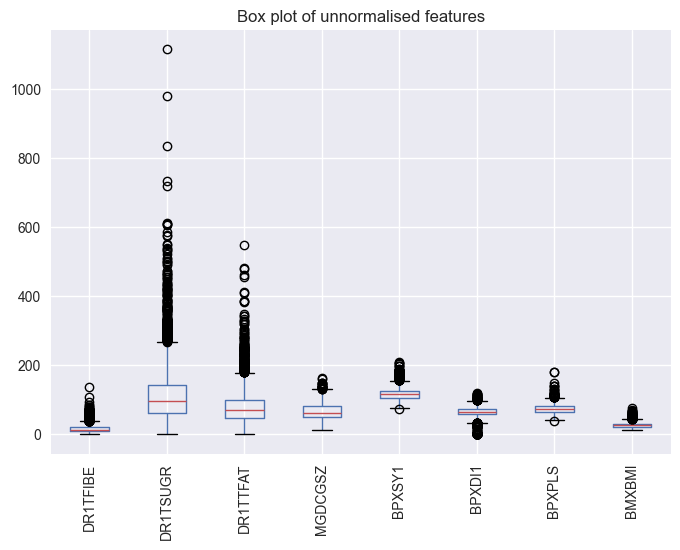

In [85]:
df_cleaned.boxplot(rot=90)
plt.title("Box plot of unnormalised features")
plt.savefig("Figures/unnormboxplot.png", dpi=400, bbox_inches='tight')
plt.show()

In [86]:
len(df)-len(df_cleaned)

3619

Now we have cleaned the data we can start doing PCA. Due to all the missing values we have lost 3619 rows and 6194 are left

117.012108.0


(array([ 20., 109., 277., 464., 731., 849., 831., 722., 575., 464., 313.,
        242., 160., 112.,  85.,  64.,  45.,  25.,  23.,  26.,   8.,   7.,
          7.,   7.,   5.,   6.,   3.,   3.,   2.,   1.,   0.,   2.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([  117.        ,   383.46666667,   649.93333333,   916.4       ,
         1182.86666667,  1449.33333333,  1715.8       ,  1982.26666667,
         2248.73333333,  2515.2       ,  2781.66666667,  3048.13333333,
         3314.6       ,  3581.06666667,  3847.53333333,  4114.        ,
         4380.46666667,  4646.93333333,  4913.4       ,  5179.86666667,
         5446.33333333,  5712.8       ,  5979.26666667,  6245.73333333,
         6512.2       ,  6778.66666667,  7045.13333333,  7311.6       ,
         7578.06666667,  7844.53333333,  8111.        ,  8377.46666667,
         8643.93333333,  8910.4       ,  9176.86666667,  9443.33333333,
         9709.8       ,  9976.26666667, 

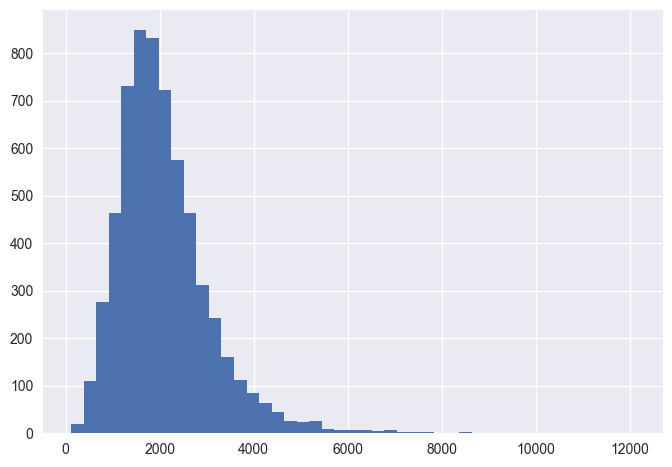

In [87]:
ImportantFeature = df_ImportantFeature.to_numpy()
print(str(min(df_ImportantFeature)) + str(max(df_ImportantFeature)))
plt.hist(ImportantFeature, bins=45)

It is interesting to note that values seem to avoid being on 50, 60, 70, 80. this is an interesting quirk of the dataset that is present before the cleaning that has been done.
On closer inspection the data for all values have decimals but there are no values between 50 and 51 for example.

Time to decide on a labelling scheme, 

2092.2712302227965
1001.8377941698582


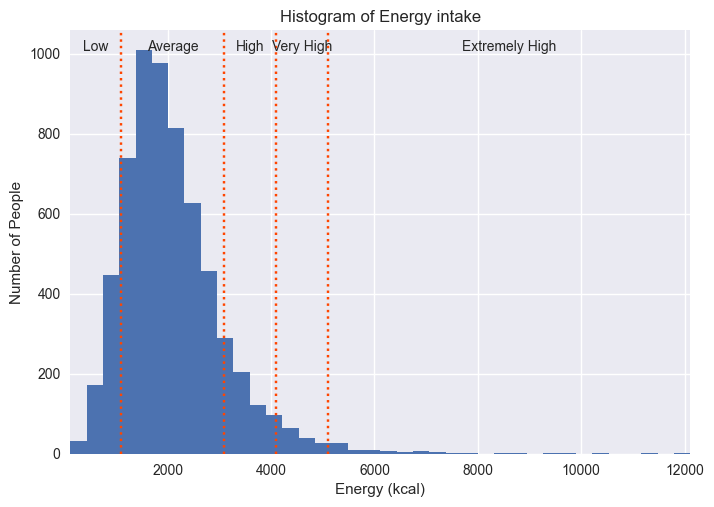

In [88]:
print(np.mean(ImportantFeature))
print(np.std(ImportantFeature))
(n, bins, s) = plt.hist(ImportantFeature, bins=38)
plt.xlim(xmin=min(ImportantFeature), xmax=max(ImportantFeature))

boundaries = [np.mean(ImportantFeature)-np.std(ImportantFeature), np.mean(ImportantFeature)+np.std(ImportantFeature), np.mean(ImportantFeature)+2*np.std(ImportantFeature), np.mean(ImportantFeature)+3*np.std(ImportantFeature)]
descriptor = ["Low", "Average", "High", "Very High", "Extremely High"]

for i in range(len(boundaries) + 1):
    if i < len(boundaries):
        plt.axvline(boundaries[i], color="orangered", linestyle=":")
    if i == 0:
        xpos = (min(bins) + min(boundaries)) / 2
    elif i == len(boundaries):
        xpos = (max(bins) + max(boundaries)) / 2
    else:
        xpos = (boundaries[i] + boundaries[i-1]) / 2
    plt.text(x=xpos, y=max(n), s=descriptor[i], horizontalalignment='center')
    
plt.title("Histogram of Energy intake")
plt.xlabel("Energy (kcal)")
plt.ylabel("Number of People")
plt.savefig("Figures/ImportantFeatureLabelsHist.png")

The labelling scheme needs to be made

In [89]:
labels = []
for L in ImportantFeature:
    for i in range(len(boundaries)):
        label = i
        if L < boundaries[i]:
            break
        else:
            label = i+1
    labels.append(label)

In [90]:
labels.count(0)

689

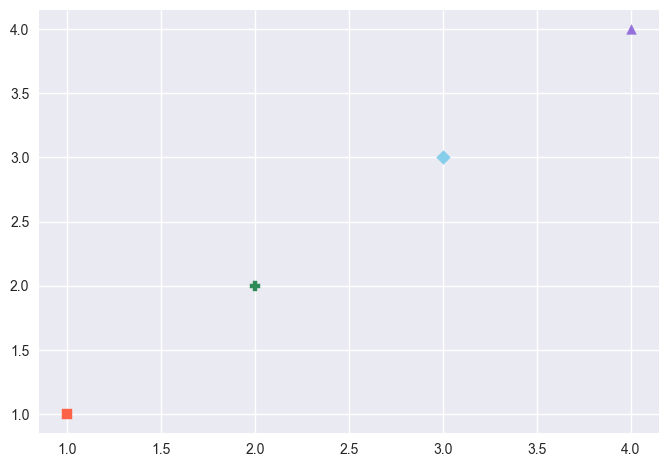

In [91]:
x = [1,2,3,4]
y = [1,2,3,4]
m = ['s', 'P','D', '^', '*']
colour = ['tomato', 'seagreen', 'skyblue', 'mediumpurple', "black"]

for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colour[i], marker=m[i])

In [92]:
'''xvar = df_cleaned["Adult Mortality"].to_numpy()
yvar = df_cleaned["infant deaths"].to_numpy()
'''
'''for i in range(len(df_cleaned)):
    plt.scatter(xvar[i], yvar[i], color=colour[labels[i]], marker=m[labels[i]])'''

'for i in range(len(df_cleaned)):\n    plt.scatter(xvar[i], yvar[i], color=colour[labels[i]], marker=m[labels[i]])'

In [93]:
def normalisefunction(arr):
    for col in range(len(arr[0, :])):
        if True:
            mean = np.mean(arr[:, col])
            var = (np.var(arr[:, col]))**0.5
            arr[:, col] = (arr[:, col]-mean)/var
        else:
            arr[:, col] = (arr[:, col] - min(arr[:, col])) / (max(arr[:, col]) - min(arr[:, col]))
    return arr
thing = np.array(np.reshape(np.arange(12), (4,3)), dtype=np.float64)
print(thing)
print(normalisefunction(thing))


[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]


In [94]:
data = df_cleaned.to_numpy()

#sort the data

sortingindex = np.array(ImportantFeature.argsort(), dtype=int)

labels = np.array(labels)[sortingindex]
data = data[sortingindex]

(6194, 8)
(6194, 8)


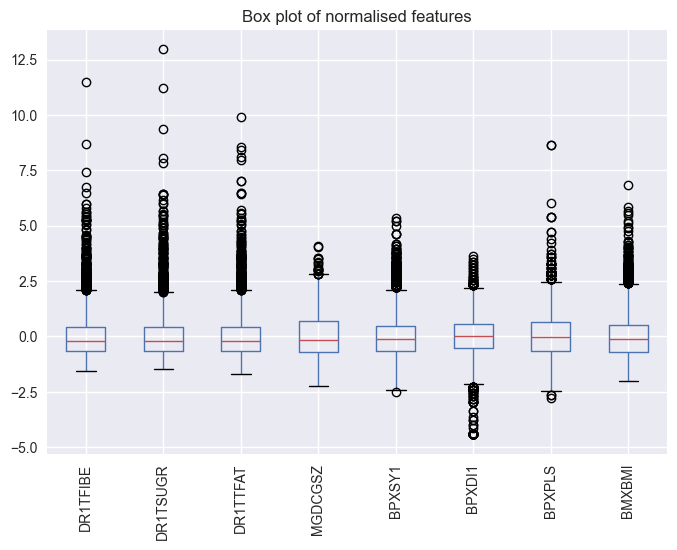

(8, 8)
[2.08480054 1.76173415 0.99921258 0.80539205 0.72372012 0.66516846
 0.5225187  0.43874519]
[[-0.34754962 -0.39608749  0.04428513 -0.39992449 -0.53512207 -0.23707031
  -0.10706601  0.45431498]
 [-0.29194717 -0.44297834 -0.21389769  0.14154235  0.53171755  0.46002564
  -0.02019897  0.3974864 ]
 [-0.40577363 -0.46225894 -0.10044087  0.00117475 -0.07898532  0.01453675
   0.04988589 -0.77629639]
 [-0.45267498  0.10559     0.14085258  0.57226435  0.10530723 -0.53891342
   0.33236238  0.15693359]
 [-0.35935827  0.39827045 -0.04435556 -0.49374223  0.06353939  0.24584577
   0.634024   -0.00544497]
 [-0.38553786  0.36430118 -0.20008453 -0.28716841  0.36743802 -0.2878746
  -0.61080434 -0.07198095]
 [ 0.21415481 -0.04312771 -0.906396    0.01437968 -0.07187009 -0.27949912
   0.21224083  0.04675455]
 [-0.31744155  0.35896744 -0.24249502  0.40753458 -0.5190176   0.46915179
  -0.23465074  0.03068108]]
[[ 1.00016147e+00  2.67487378e-01  4.82522008e-01  1.33109953e-01
   3.96065610e-02  3.1699662

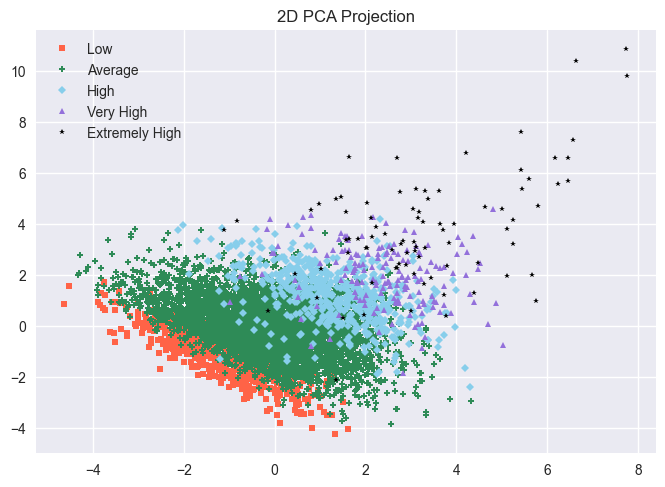

'for i in range(len(df_cleaned)):\n    plt.scatter(data[:, 0][i], data[:, 1][i], color=colour[labels[i]], marker=m[labels[i]])'

In [95]:
print(np.shape(data))
#data = data.T
newdata = normalisefunction(data)#preprocessing.normalize(data, axis=0)
print(np.shape(newdata))
k = pd.DataFrame(newdata, columns=["DR1TFIBE", "DR1TSUGR", "DR1TTFAT", "MGDCGSZ", "BPXSY1", "BPXDI1", "BPXPLS", "BMXBMI"])
plt.show()
k.boxplot(rot=90)
plt.title("Box plot of normalised features")
plt.savefig("Figures/boxplot.png", dpi=400, bbox_inches='tight')
plt.show()
C = np.cov(newdata.T)
print(np.shape(C))

eigenvalues, eigenvectors = np.linalg.eig(C)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print(eigenvalues)
print(eigenvectors)
original_cov_matrix = np.diagflat(eigenvalues)

back_to_cov = eigenvectors @ original_cov_matrix @ eigenvectors.T
print(back_to_cov)
eigscores = np.dot(eigenvectors[:, :].T, newdata.T)
print(np.shape(eigscores))
for lab in np.unique(labels):
    i = np.argwhere(labels == lab)
    plt.plot(-eigscores[0, :][i], -eigscores[1, :][i], color=colour[lab], marker=m[lab], ls='', alpha=1, label=descriptor[lab], markersize=4)
plt.legend()
plt.title("2D PCA Projection")
plt.savefig("Figures/PCAScatternonorm.png", dpi=400)
plt.show()
'''for i in range(len(df_cleaned)):
    plt.scatter(data[:, 0][i], data[:, 1][i], color=colour[labels[i]], marker=m[labels[i]])'''


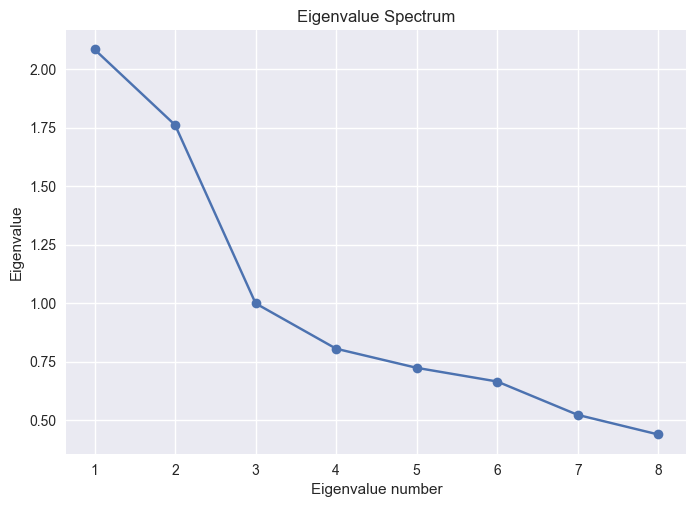

0.7967287793666797

In [96]:
plt.plot(np.arange(len(eigenvalues))+1, eigenvalues, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue Spectrum")
plt.savefig("Figures/EigenvalueDistribution.png", dpi=400)
plt.show()
sum(eigenvalues[:5])/sum(eigenvalues)


This suggests that 84 percent of the variance can be described by 5 variables, rather than 100 percent of the variance by 18

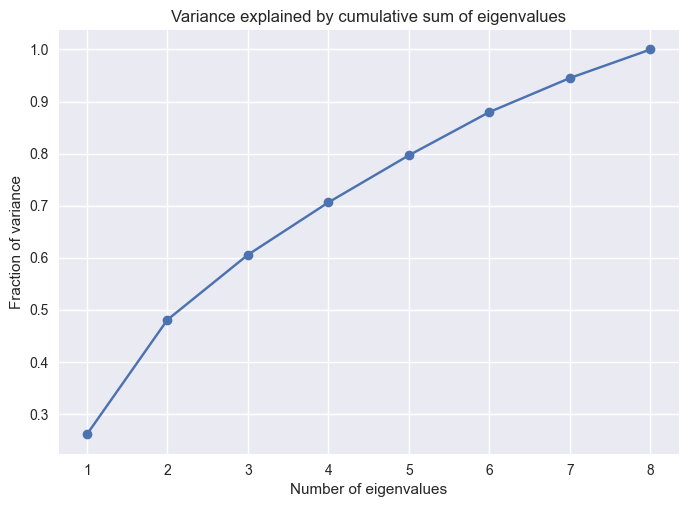

In [97]:
running_total = 0 
cumulative_eigenvalues = [0]
for x in eigenvalues:
    cumulative_eigenvalues.append(cumulative_eigenvalues[-1]+x)
cumulative_eigenvalues.pop(0)
plt.plot(np.arange(len(eigenvalues))+1, cumulative_eigenvalues/sum(eigenvalues), marker='o')
plt.xlabel("Number of eigenvalues")
plt.ylabel("Fraction of variance")
plt.title("Variance explained by cumulative sum of eigenvalues")
plt.savefig("Figures/EigenvalueFraction.png", dpi=400)
plt.show()

In [98]:
np.ones((4,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

1.0000000000000002


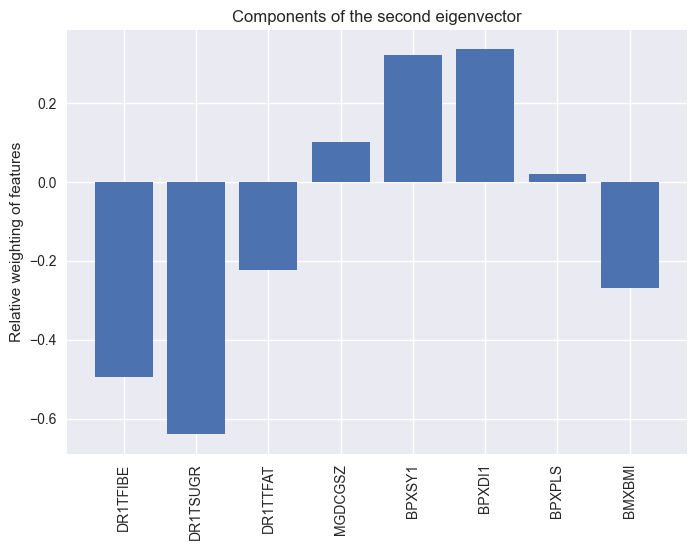

In [99]:
print(sum(((eigenvectors[1]+eigenvectors[2])/np.sqrt(2))**2)**0.5)
#eigenthing = pd.DataFrame(eigenvectors[1], columns=["DR1TKCAL", "DR1TFIBE", "DR1TSUGR", "DR1TTFAT", "MGDCGSZ", "BPXSY1", "BPXDI1", "BPXPLS"])

plt.bar(["DR1TFIBE", "DR1TSUGR", "DR1TTFAT", "MGDCGSZ", "BPXSY1", "BPXDI1", "BPXPLS", "BMXBMI"], list((eigenvectors[1]+eigenvectors[2])/np.sqrt(2)).copy())
plt.xticks(rotation=90)
plt.ylabel("Relative weighting of features")
plt.title("Components of the second eigenvector")
plt.savefig("Figures/eigenvector.png", dpi=400, bbox_inches='tight')
plt.show()
#eigenthing.plot.bar()            